## Credit Card Fraud Detection

In this project we will predict fraudulent credit card transactions with the help of Machine learning models.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Exploratory data analysis

In [5]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/'+'creditcard.csv')
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [ ]:
print(df.shape, "is the shape of the original dataframe.")

(284807, 31) is the shape of the original dataframe.


This is as expected, 284807 rows and 31 columns. No loss of records while reading the raw data file. Now, let's look at other descriptive stats.

In [ ]:
#observe the different feature type present in the data
100*df.isnull().sum()/df.shape[0]

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

As expected we do not see any Missing values in any of the columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We can observe that we have 30 float type variables and 1 int type variable. This Class (int) variable is our target variable.
Columns with Prefix, 'V' are PCA transformed features.

In [ ]:
# Obeserving summary stats of Amount variable
df.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

As we can also notice that the minimum value of Amount is down to 0 units. Whereas, the maximum goes as high as 25K units of currency and mean is around 88 units.

In [ ]:
df.Time.describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

Looking at the summary statictics of Time variable tells us that the mean time between transactions is 94k seconds. Whereas, minimum is 0 secs and maximum is 172k seconds.

Here we will observe the distribution of our classes

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [ ]:
# Non-Fraudelent %share of Class 0
normal_share

99.82725143693798

In [ ]:
# Fradulent %share of Class 1
fraud_share

0.1727485630620034

Now we can clearly see that the about 99.8% of the records belong to class 0, non-fraudulent transactions. Whereas, about 0.17% of the records belong to class 1, Farudulent Transactions.



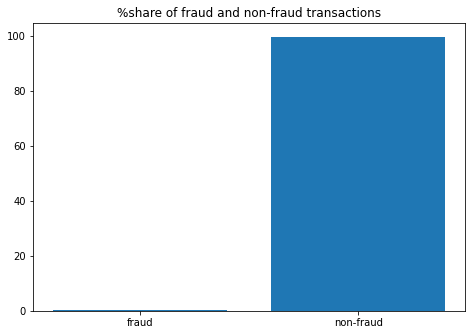

In [ ]:
# bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('%share of fraud and non-fraud transactions')
class_type = ['fraud', 'non-fraud']
percent_share = [fraud_share, normal_share]
ax.bar(class_type,percent_share)
plt.show()

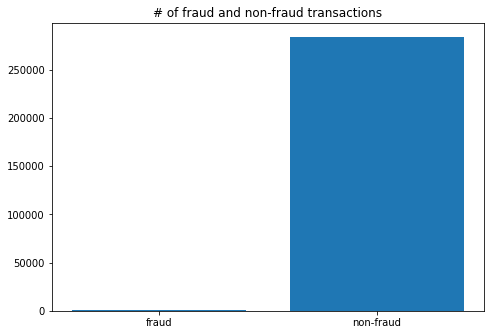

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title('# of fraud and non-fraud transactions')
class_type = ['fraud', 'non-fraud']
percent_share = [classes[1], classes[0]]
ax.bar(class_type,percent_share)
plt.show()

We can clearly observe that the class variable/Target variable data is Skewed towards class 0, i.e. Non-Fraudulent transactions. We would need to mitigate this class imbalance problem in order to achieve well performing prediction model.

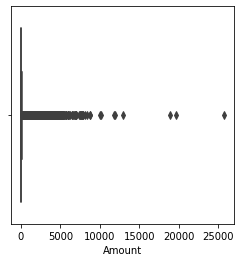

In [ ]:
# Box plot of Amount
plt.figure(figsize = (4,4))
sns.boxplot(x='Amount', data=df)
plt.show()

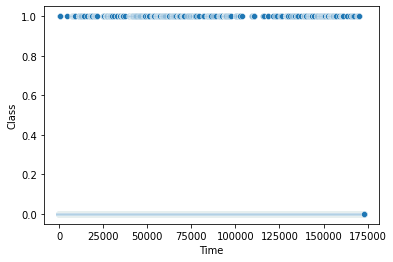

In [ ]:
# scatter plot to observe the distribution of classes with time
sns.scatterplot(data=df, x="Time", y="Class")

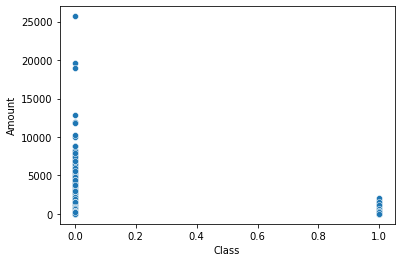

In [ ]:
# scatter plot to observe the distribution of classes with Amount
sns.scatterplot(data=df, x="Class", y="Amount")

In the above plots we can notice that the realtionship of Time and Class is soming up to be less relevant, as both the fraudulent and non-fraud transactions seem to happen across the time time range.
Interestingly, we do notice a pattern in Fraud transactions, they tend to happen for Amount less than 5000.

#### Drop unnecessary columns

In [6]:
# We can go ahed and delete time variable based on our reasoning above
df.drop("Time", inplace=True, axis=1)

In [7]:
# Rechecking the shape of updated dataframe
print(df.shape)
print(df.columns)

(284807, 30)
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


We confirm that we have one less column in our dataframe.

### Splitting the data into train & test data

In [8]:
# Defining X and y datasets
X = df.drop('Class',axis=1)
y = df[['Class']]
print(X.shape)
print(y.shape)

(284807, 29)
(284807, 1)


In [ ]:
print(X.head())
print(y.head())

         V1        V2        V3        V4  ...       V26       V27       V28  Amount
0 -1.359807 -0.072781  2.536347  1.378155  ... -0.189115  0.133558 -0.021053  149.62
1  1.191857  0.266151  0.166480  0.448154  ...  0.125895 -0.008983  0.014724    2.69
2 -1.358354 -1.340163  1.773209  0.379780  ... -0.139097 -0.055353 -0.059752  378.66
3 -0.966272 -0.185226  1.792993 -0.863291  ... -0.221929  0.062723  0.061458  123.50
4 -1.158233  0.877737  1.548718  0.403034  ...  0.502292  0.219422  0.215153   69.99

[5 rows x 29 columns]
   Class
0      0
1      0
2      0
3      0
4      0


In the above steps we have successfully separated target column from our original dataset to a separate dataframe.
Now we can go ahead and divide these two dataframes into train and test.
Noting that we have a total of 284807 records with us initially.

In [9]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30, random_state=10, stratify=y)

In [ ]:
print(df.shape[0], "total records")
print(y_train.shape[0], "y_train records")
print(y_test.shape[0], "y_test records")
print("1s in y\n", np.sum(y))
print("1s in y_train\n", np.sum(y_train))
print("1s in y_test\n", np.sum(y_test))

284807 total records
199364 y_train records
85443 y_test records
1s in y
 Class    492
dtype: int64
1s in y_train
 Class    344
dtype: int64
1s in y_test
 Class    148
dtype: int64


We can see that by using stratified option while performing train test split we are able to achieve 0.17% of 1s in y_test and y_train respectively. This is same as the original raw data provided.

However, we are clearly aware that the there is large class imbalance present in the data with only 0.17% class 1s present.

### Plotting the distribution of a variable

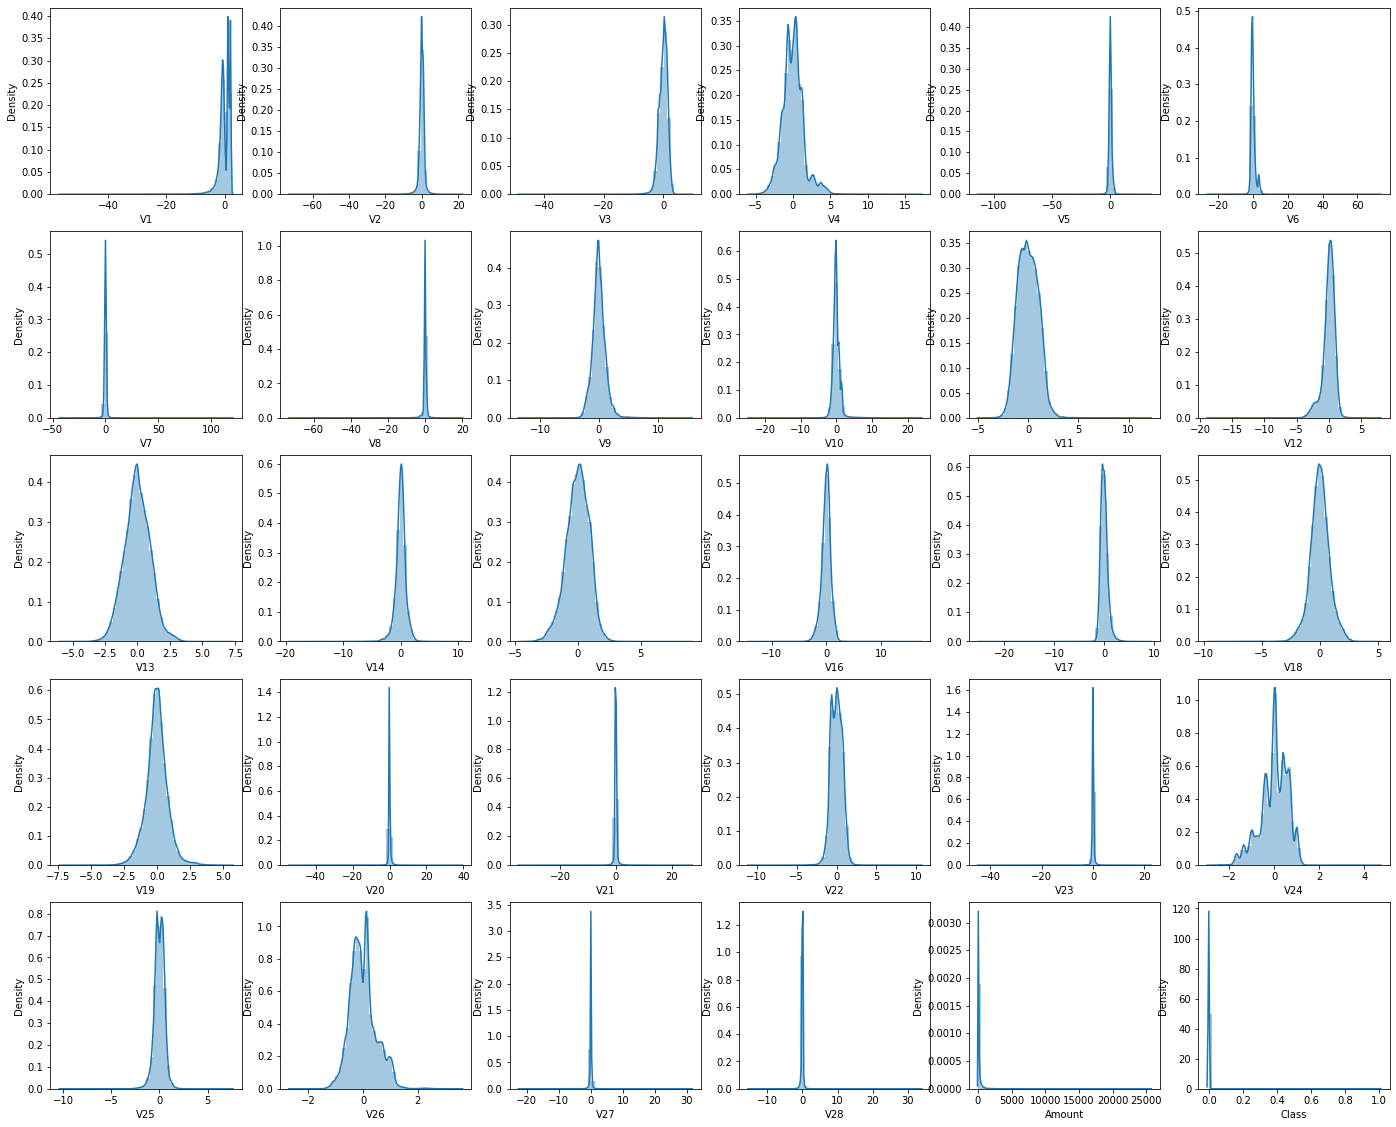

In [ ]:
#Distribution of features
plt.figure(figsize = (24,24))
for i, column in enumerate(df.columns, 1):
    plt.subplot(6,6,i)
    sns.distplot(df[column])

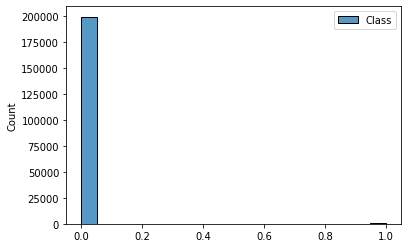

In [ ]:
# Histogram to check the skewness
sns.histplot(y_train)

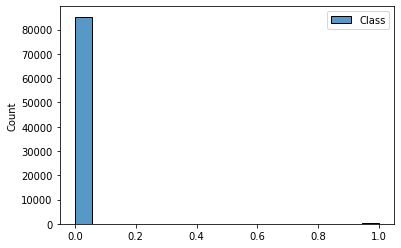

In [ ]:
sns.histplot(y_test)

In the above plots we can observe that the variable Amount seems to be heavily skewed. This is have bad impact on the model's performance. Hence, we can transform this data before feeding into the model. 

- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199364 entries, 148059 to 77435
Data columns (total 29 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      199364 non-null  float64
 1   V2      199364 non-null  float64
 2   V3      199364 non-null  float64
 3   V4      199364 non-null  float64
 4   V5      199364 non-null  float64
 5   V6      199364 non-null  float64
 6   V7      199364 non-null  float64
 7   V8      199364 non-null  float64
 8   V9      199364 non-null  float64
 9   V10     199364 non-null  float64
 10  V11     199364 non-null  float64
 11  V12     199364 non-null  float64
 12  V13     199364 non-null  float64
 13  V14     199364 non-null  float64
 14  V15     199364 non-null  float64
 15  V16     199364 non-null  float64
 16  V17     199364 non-null  float64
 17  V18     199364 non-null  float64
 18  V19     199364 non-null  float64
 19  V20     199364 non-null  float64
 20  V21     199364 non-null  float64
 21  V22   

In [10]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer

power = PowerTransformer(copy=False, method='yeo-johnson', standardize=True)
X_train_tf = power.fit_transform(X_train)

# convert the array back to a dataframe
X_train_tf = pd.DataFrame(X_train, columns=X_test.columns)

X_test_tf = power.fit_transform(X_test)

# convert the array back to a dataframe
X_test_tf = pd.DataFrame(X_test, columns=X_train.columns)

In [11]:
print(X_train_tf.head(2))
print(X_test_tf.head(2))

              V1        V2        V3  ...       V27       V28    Amount
148059 -0.605880  0.956151 -0.403579  ...  0.632853  0.613780 -0.236651
110272 -0.683167 -0.358786 -0.106439  ...  0.059794  0.024942  1.144906

[2 rows x 29 columns]
              V1        V2        V3  ...       V27       V28    Amount
130092  0.677285 -0.325402  0.552596  ...  0.206165  0.120069 -1.539659
97022   0.651637  0.163382  0.154801  ...  0.011238  0.025451 -0.587939

[2 rows x 29 columns]


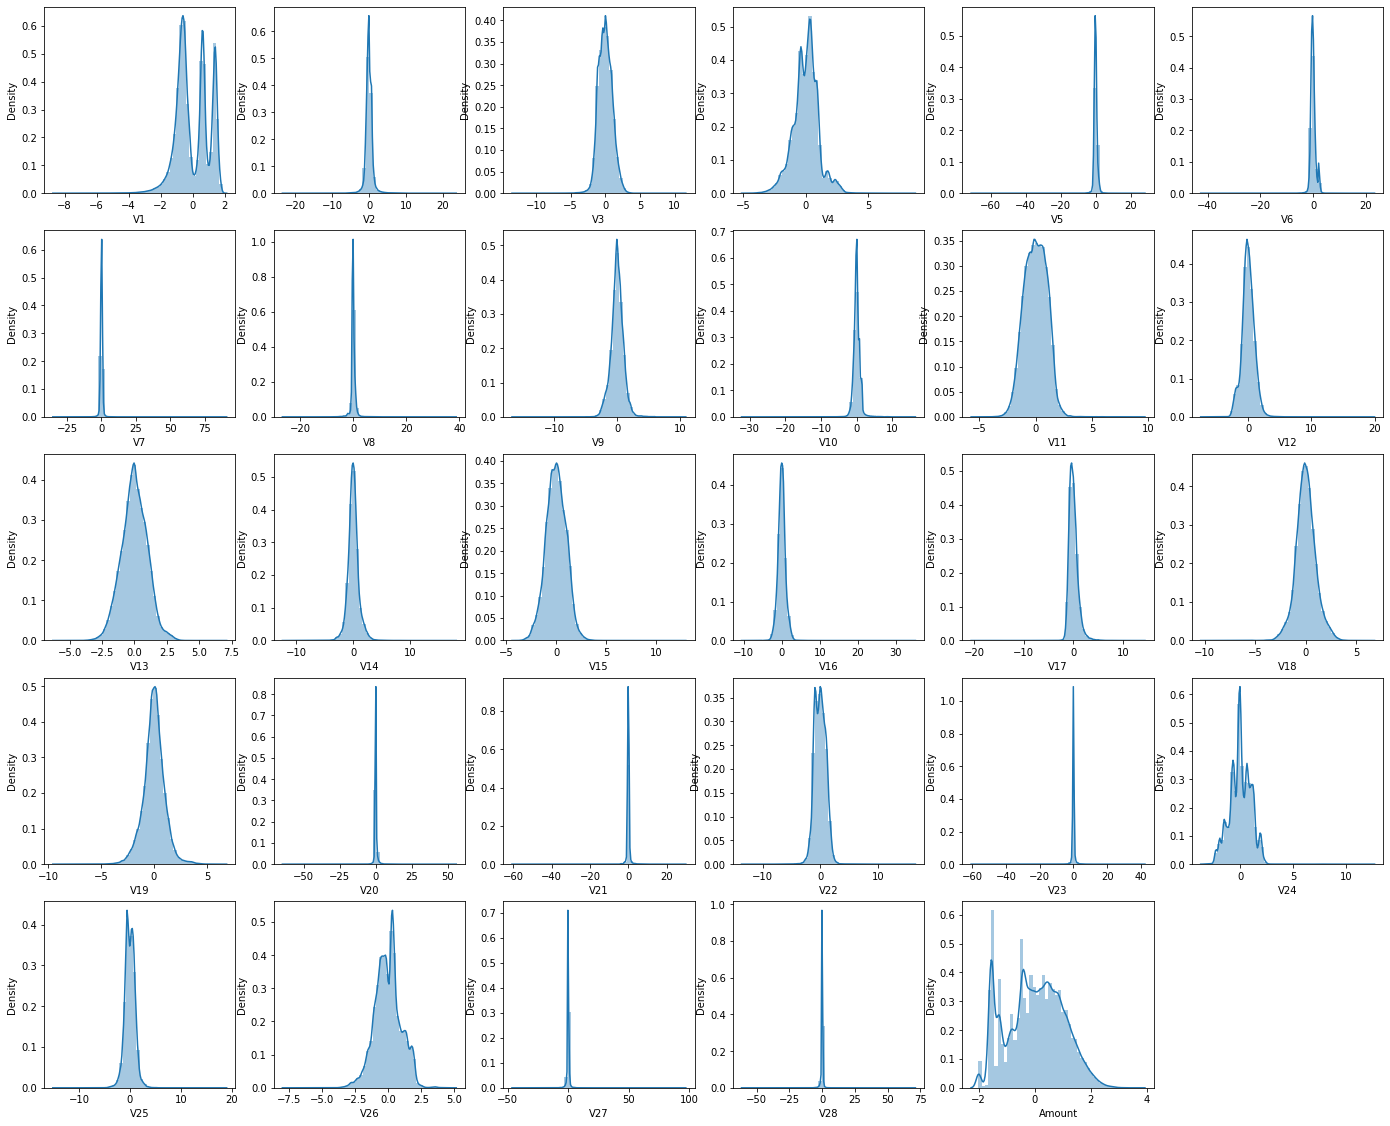

In [ ]:
# Distribution of features

plt.figure(figsize = (24,24))
for i, column in enumerate(X_train.columns, 1):
    plt.subplot(6,6,i)
    sns.distplot(X_train[column])

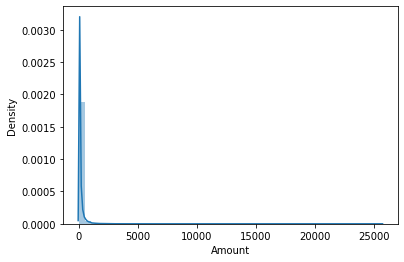

In [ ]:
# plot the histogram of a variable from the dataset again to see the result after transformation
sns.distplot(df["Amount"])

In the above example we can observe that the values of Amount were in range of 0 - ~25000 in original data and now after PowerTransformation the values are standardized and shrunk between the range of -2 and 4.
This is expected and we can go ahead with next steps.

In [ ]:
y_train = y_train.values.flatten()
y_test = y_test.values.flatten()

In [ ]:
y_test[:]

array([0, 0, 0, ..., 0, 0, 0])

## Model Building
- Build different models on the imbalanced dataset and see the result

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score #import the package
lr = LogisticRegression(max_iter = 10000, random_state=42, solver = "lbfgs")
num_C = [0.1, 0.01, 0.001, 1, 2]  #--> list of values
cv_num = 11
penalty = ['l2']  #--> list of values
grid = dict(penalty=penalty,C=num_C)
logreg_cv=GridSearchCV(lr,grid,cv=cv_num,scoring='roc_auc')
grid_result = logreg_cv.fit(X_train_tf,y_train)

In [ ]:
print(grid_result.best_params_)
print(grid_result.best_score_)

{'C': 0.01, 'penalty': 'l2'}
0.9763828228906847


We can see that the GridSearch CV has come up with C=0.01 for Ridge regression (l2) and model performance is about 97% using AUC metric.
We can try out with much smaller values of C and check if the model performance increases.

In [ ]:
lr = LogisticRegression(max_iter = 10000, random_state=42, solver = "lbfgs")
num_C = [0.01, 0.001, 0.0001]  #--> list of values
cv_num = 11
penalty = ['l2']  #--> list of values
grid = dict(penalty=penalty,C=num_C)
logreg_cv_1=GridSearchCV(lr,grid,cv=cv_num,scoring='roc_auc')
grid_result_1 = logreg_cv.fit(X_train_tf,y_train)

In [ ]:
print(grid_result_1.best_params_)
print(grid_result_1.best_score_)

{'C': 0.01, 'penalty': 'l2'}
0.9763828228906847


We can clearly observe that the C=0.01 is coming out to be best in above test.

#### perfoming cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [ ]:
print("total 1's in y_train",y_train.sum())
print("number of rows in y_train", y_train.shape)

total 1's in y_train 344
number of rows in y_train (199364,)


In [ ]:
# we see that 199364 rows have 344 1's. In order to get the number of splits required to have atleast 10 1's in each split.
# we must follow this calculation: (199364 x 10)/ 344 = 5795.4 records.
# now to get number of splits: 199364/5796 = 34

In [ ]:
X_cv = X_train.copy()
y_cv = y_train.copy()
print(X_cv.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(copy=False, method='yeo-johnson', standardize=True)
X_tf_cv = power.fit_transform(X_cv)

# convert the array back to a dataframe
X_tf_cv = pd.DataFrame(X_tf_cv, columns=X_cv.columns)

In [ ]:
X_tf_cv.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.621142,0.955083,-0.401501,-0.123831,0.301879,-0.835276,0.592941,0.200563,-0.095295,-1.467277,-0.803212,-0.013490,0.220968,-1.586867,-0.997697,0.055903,1.694129,0.261158,-0.400368,-0.057448,0.123921,0.66265,-0.361839,-0.223641,-0.337105,1.196816,0.632766,0.613698,-0.238475
1,-0.695953,-0.350338,-0.103864,-1.524296,0.262676,0.643549,0.717827,-0.035996,-1.480650,0.282424,-0.448040,-0.863978,-0.430431,0.315513,-0.156836,-0.980686,-0.919323,1.928403,-0.595895,-0.756488,-0.540038,-0.88202,0.409046,-2.378476,-0.369103,1.787555,0.059509,0.020218,1.145620


In [ ]:
print("X_train",X_train.index)

X_train Int64Index([148059, 110272, 255089,  29982,  91450, 133197, 261612,  68701,
            197583, 128625,
            ...
            141027,  84704, 204142, 236913, 191385, 134380, 131078,  61104,
            216213,  77435],
           dtype='int64', length=199364)


In [ ]:
# Resetting index of the X_train and converting y_train to Dataframe before feeding them for StratifiedKFold split
X_train.reset_index(inplace=True,drop=True)
y_train = pd.DataFrame(y_train)

In [ ]:
#perform cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
skf = StratifiedKFold(n_splits=34, shuffle=True, random_state=42)
cv_score =[]
i=1

for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.loc[train_index], X_train.loc[test_index]
    y_train_cv, y_test_cv = y_train.loc[train_index], y_train.loc[test_index]
    
    #model
    lr = LogisticRegression(max_iter = 1000, random_state=42, solver = "lbfgs", penalty='l2', C=0.01)
    lr.fit(X_train_cv, y_train_cv.values.flatten())
#    score = roc_auc_score(X_train_cv,lr.predict(y_train_cv))
    score = roc_auc_score(y_train_cv, lr.predict_proba(X_train_cv)[:, 1])
    cv_score.append(score)

# Print the output.
print('List of possible AUC score on TrainCV :', cv_score)
print('\nMaximum AUC on TrainCV :',
      max(cv_score)*100, '%')
print('\nMinimum AUC:',
      min(cv_score)*100, '%')


List of possible AUC score on TrainCV : [0.9791444310782058, 0.9805063573194251, 0.9789363633190429, 0.9782272217727658, 0.9784840515380617, 0.9782373120671055, 0.9789214681226368, 0.978922413603366, 0.9788076384427132, 0.9787369598832836, 0.9782791767138203, 0.9787443377329084, 0.9782904449841505, 0.9787148573337778, 0.9787236921537065, 0.9784427913790261, 0.9783079131281146, 0.9796516117408496, 0.9800345314175316, 0.9784330137651357, 0.9783782913199428, 0.9814316172079144, 0.9804793804275156, 0.9774353357302541, 0.978449118318985, 0.9785741226239999, 0.9785570575601659, 0.97811888375945, 0.9783821135315602, 0.9781483175071528, 0.9819903593084065, 0.978115969833927, 0.9785840733696687, 0.9793579840892846]

Maximum AUC on TrainCV : 98.19903593084065 %

Minimum AUC: 97.74353357302542 %


In [ ]:
# Hyperparameter Tuning Linear Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
params = {'C': np.linspace(0.002,1,20)}
grid_search = GridSearchCV(estimator=lr,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring='roc_auc')

grid_search.fit(X_train_cv, y_train_cv)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([0.002     , 0.05452632, 0.10705263, 0.15957895, 0.21210526,
       0.26463158, 0.31715789, 0.36968421, 0.42221053, 0.47473684,
       0.52726316, 0.57978947, 0.63231579, 0.68484211, 0.73736842,
       0.78989474, 0.84242105, 0.89494737, 0.94747368, 1.        ])},
             pre_dispatch='2*n_jobs', refit=True, ret

In [ ]:
print ("Best Params", grid_search.best_params_)
print ("Best Score", grid_search.best_score_)

Best Params {'C': 0.05452631578947369}
Best Score 0.9756357593982325


In [ ]:
lr_best = LogisticRegression(C=0.05, solver = "lbfgs", penalty='l2')
lr_best.fit(X_train_cv, y_train_cv)
score = roc_auc_score(y_test_cv, lr_best.predict_proba(X_test_cv)[:, 1])
print("Best AUC for TestCV: ", score)

Best AUC for TestCV:  0.9555783358961217


KNN model on Imbalanced data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


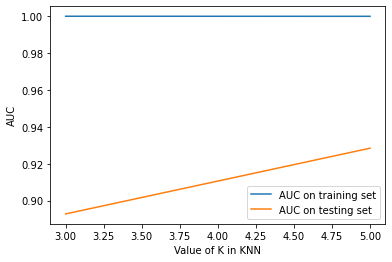

In [ ]:
# Finding the Best k in KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
k_range = [3,5]
score1=[]
score2=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_cv,y_train_cv.values.flatten())
    y_train_proba = knn.predict_proba(X_train_cv)[:,1]
#    fpr, tpr, thresholds = roc_curve(y_train_cv, y_train_proba)
    score1.append(roc_auc_score(y_train_cv,y_train_proba))

    y_test_proba = knn.predict_proba(X_test_cv)[:,1]
#    fpr, tpr, thresholds = roc_curve(y_test_cv, y_test_proba)
    score2.append(roc_auc_score(y_test_cv,y_test_proba))
    
%matplotlib inline
plt.plot(k_range,score1,label= 'AUC on training set')
plt.plot(k_range,score2,label= 'AUC on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('AUC')
plt.legend()

RandomForest in Imbalanced data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [ ]:
rf.fit(X_train_cv, y_train_cv)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=100, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# roc_auc_score(y_test_cv, rf.predict_proba(X_test_cv)[:,1])

In [ ]:
# Hyper-Parameter Tuning RandomForest

from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42, n_jobs=-1,warm_start=True)
params = {
    'max_depth': [3,5],
    'min_samples_leaf': [10,20]
}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 34,
                           n_jobs=-1, verbose=1, scoring='roc_auc')

In [ ]:
grid_search.fit(X_train_cv, y_train_cv)

Fitting 34 folds for each of 4 candidates, totalling 136 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed: 63.7min finished


GridSearchCV(cv=34, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                   

In [ ]:
grid_search.best_score_

0.9607630636922434

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=True)

In [ ]:
rf.fit(X_train_cv,y_train_cv.values.flatten())
y_proba = rf.predict_proba(X_test_cv)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_cv, y_proba)

No handles with labels found to put in legend.


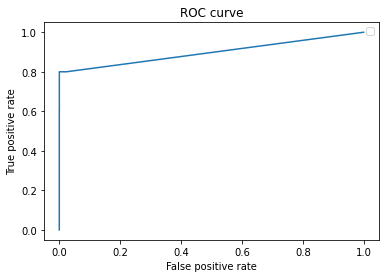

In [ ]:
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('1.png')
plt.show()

In [ ]:
roc_auc_score(y_test_cv, rf.predict_proba(X_test_cv)[:,1],average='macro')

0.897625149495985

XGBoost Model on Imbalanced Data

In [ ]:
# Installing XGBoost on GoogleColab
!pip install -q xgboost==0.4a30

     |████████████████████████████████| 757kB 20.8MB/s 


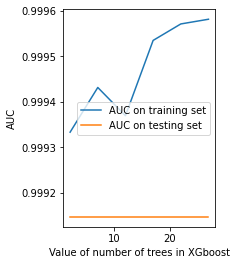

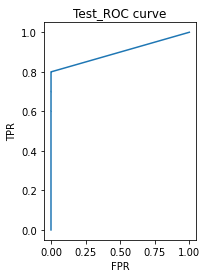


AUC score:  0.8996753801469333


In [ ]:
from xgboost import XGBClassifier
from matplotlib import pyplot
tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train_cv,y_train_cv.values.flatten(), eval_metric='auc')
    score1.append(xgb.score(X_train_cv,y_train_cv))
    score2.append(xgb.score(X_test_cv,y_test_cv))
    y_pred = xgb.predict_proba(X_test_cv)
    y_true = np.array(y_test_cv)
    y_scores = y_pred[:, 1]

    fpr, tpr, _ = roc_curve(y_test_cv, y_scores)
    roc_auc = auc(fpr, tpr)

   
%matplotlib inline
plt.subplot(1, 2, 1)
plt.plot(tree_range,score1,label= 'AUC on training set')
plt.plot(tree_range,score2,label= 'AUC on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('AUC')
plt.legend()
plt.show()

plt.subplot(1, 2, 2)
pyplot.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Test_ROC curve')
plt.show()
print()
print("AUC score: ", roc_auc) 

In [ ]:
# HyperParameter Tuning
# Using RandomizedSerarch to reduce the processing time
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb=XGBClassifier(n_estimators=100)
params = {
        'gamma': [0.5, 1, 1.5, 2, 5],
        'max_depth': [3, 4, 5]
        }
param_comb = 4
random_search = RandomizedSearchCV(xgb, param_distributions=params,
                                   n_iter=param_comb, scoring='roc_auc',
                                   n_jobs=-1, cv=5, verbose=3, random_state=42 )
random_search.fit(X_train_cv, y_train_cv.values.flatten())


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 10.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='de

In [ ]:
print('\n Best estimator:',random_search.best_estimator_)
print('\n Best hyperparameters:',random_search.best_params_)
print("Best_score",random_search.best_score_)


 Best estimator: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=5,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

 Best hyperparameters: {'max_depth': 4, 'gamma': 5}
Best_score 0.9724835207103861


In [ ]:
# Fitting Model with Best Parameters on Test data
xgb=XGBClassifier(n_estimators=50,max_depth=5,gamma=2,base_score=0.5)
xgb.fit(X_test_cv,y_test_cv.values.flatten(), eval_metric='auc')
y_pred = xgb.predict_proba(X_test_cv)
y_true = np.array(y_test_cv)
y_scores = y_pred[:, 1]

In [ ]:
fpr, tpr, _ = roc_curve(y_test_cv, y_scores)
roc_auc = auc(fpr, tpr)
print("AUC on TestCV set: ",roc_auc)

AUC on TestCV set:  0.9994703570818384


Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)
dt_base.fit(X_train_cv, y_train_cv)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Train AUC 0.91


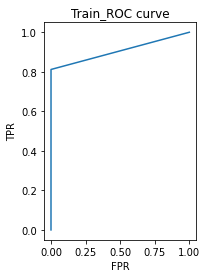

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot
X_train_predictions = dt_base.predict(X_train_cv)

X_train_fpr,X_train_tpr, X_train_thresholds = roc_curve(y_train_cv, X_train_predictions)

# auc scores
auc_score1 = roc_auc_score(y_train_cv, X_train_predictions)

print("Train AUC",round(auc_score1,2))

plt.subplot(1, 2, 1)
pyplot.plot(X_train_fpr, X_train_tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Train_ROC curve')
plt.show()

In [ ]:
# Hyper Parameter Tuning for DecisionTree model
from sklearn.model_selection import GridSearchCV

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
params = {
    "max_depth": [5,10],
    "min_samples_leaf": [50,100]
}

In [ ]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, verbose=1, scoring='roc_auc')

In [ ]:
grid_search.fit(X_train_cv, y_train_cv)

Fitting 34 folds for each of 4 candidates, totalling 136 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 136 out of 136 | elapsed: 19.6min finished


GridSearchCV(cv=34, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'min_samples_leaf': [50, 100]},
  

In [ ]:
grid_search.best_score_

0.950623973527658

In [ ]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

AUC 0.5


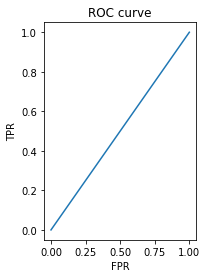

In [ ]:
dt = DecisionTreeClassifier(random_state=42,
                            max_depth=10,
                            min_samples_split=2,
                            min_samples_leaf=100)
dt.fit(X_test_cv, y_test_cv)

X_test_pred_best = dt.predict(X_test_cv)

X_test_fpr,X_test_tpr, X_test_thresholds = roc_curve(y_test_cv, X_test_pred_best)

auc_score = roc_auc_score(y_test_cv, X_test_pred_best)

print("AUC",round(auc_score,2))
plt.subplot(1, 2, 1)
pyplot.plot(X_test_fpr, X_test_tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

SVM Model family

In [ ]:
from sklearn.svm import SVC

In [ ]:
svclassifier = SVC(kernel='linear', random_state=42,cache_size=500)
svclassifier.fit(X_train_cv, y_train_cv.values.flatten())

SVC(C=1.0, break_ties=False, cache_size=500, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = svclassifier.predict(X_test_cv)

AUC 0.9


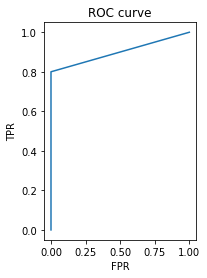

In [ ]:
from matplotlib import pyplot
X_test_fpr,X_test_tpr, X_test_thresholds = roc_curve(y_test_cv, y_pred)

auc_score = roc_auc_score(y_test_cv, y_pred)

print("AUC",auc_score)
plt.subplot(1, 2, 1)
pyplot.plot(X_test_fpr, X_test_tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_cv,y_pred))
print(classification_report(y_test_cv,y_pred))

[[5853    0]
 [   2    8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5853
           1       1.00      0.80      0.89        10

    accuracy                           1.00      5863
   macro avg       1.00      0.90      0.94      5863
weighted avg       1.00      1.00      1.00      5863



In [ ]:
#Hyperparameter tuning SVM
from sklearn.model_selection import GridSearchCV

In [ ]:
# limiting variety of parameters due to timeout constrain on googleColab
# defining parameter range
param_grid = {'C': [0.1, 1], 
              'gamma': [1, 0.1],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, cv=3)
  
# fitting the model for grid search
grid.fit(X_train_cv, y_train_cv.values.flatten())

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
# We can see that RandomForest Model family performs better when compared to other.
# Lets rebuild the model with best parameters and try to understand the Feature imporance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, oob_score=True)
clf.fit(X_train, y_train)

print(roc_auc_score(y_test_cv, clf.predict_proba(X_test_cv)[:,1],average='macro'))

0.9888433282077567


In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30, random_state=10, stratify=y)

In [ ]:
y_train = y_train.values.flatten()
y_train.shape

(199364,)

Top var = 12
2nd Top var = 17
3rd Top var = 14


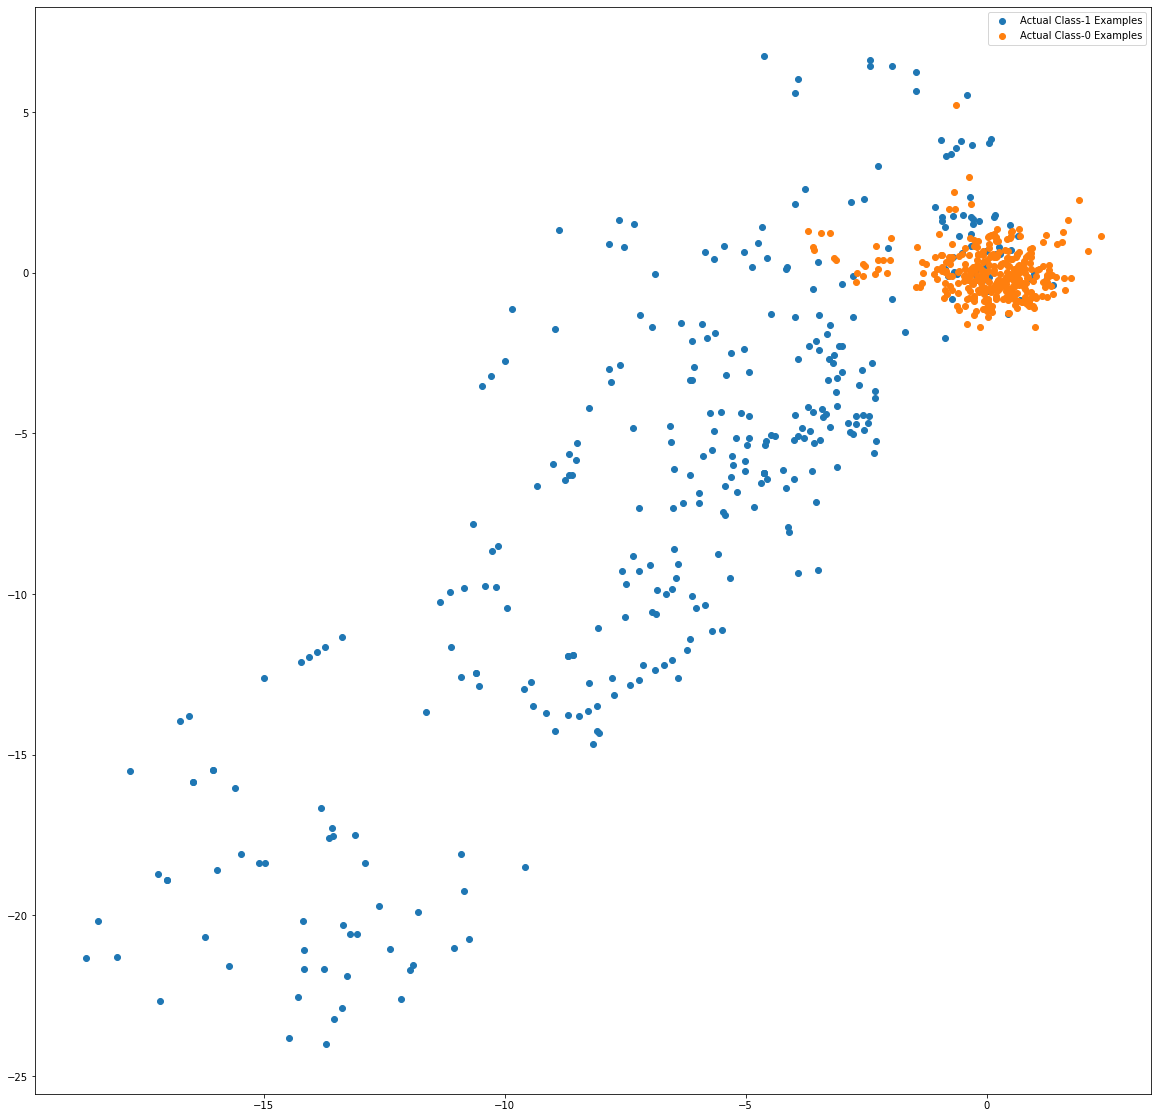

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling

In [ ]:
import imblearn
print(imblearn.__version__)

0.4.3


In [ ]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy="minority")

In [ ]:
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [ ]:
print(X_over.shape)
print(X_train.shape)

(398040, 29)
(199364, 29)


In [ ]:
print(y_over.shape)
print(y_train.shape)

(398040,)
(199364, 1)


In [ ]:
print(y_over.sum())
print(y_train.sum())

199020
0    344
dtype: int64


In [ ]:
# Original split of classes
y_train.value_counts(normalize=True)

0    0.998275
1    0.001725
dtype: float64

In [ ]:
# New Split of classes after oversampling
pd.DataFrame(y_over).value_counts(normalize=True)

1    0.5
0    0.5
dtype: float64

We can notice that after running RandomOverSampling method using "minority" argument we are able to achieve 50-50 ratio of both the classes, hence Balanced data.
It would be interesting to use this OverSampled data and test out building models from different family and compare their performance to imbalanced data earlier.

In [ ]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(copy=False, method='yeo-johnson', standardize=True)
X_over_tf = power.fit_transform(X_over)

# convert the array back to a dataframe
X_over_tf = pd.DataFrame(X_over_tf, columns=X_train.columns)
y_over = pd.DataFrame(y_over)

In [ ]:
# Validating the transformation
X_over_tf.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.07971,0.030971,0.317137,-0.737170,0.403290,-0.183355,0.704516,-0.077128,0.376829,0.049456,-1.168826,0.654954,0.246635,0.095126,-0.899948,0.487751,0.912080,0.410047,-0.463220,-0.158874,-0.087158,0.425768,-0.227141,-0.133444,-0.337212,1.149617,0.085736,0.358921,-0.083708
1,-0.13162,-0.622760,0.492776,-1.811259,0.381308,0.860759,0.768453,-0.137346,-0.302231,0.708419,-0.903800,0.220119,-0.368260,0.860532,-0.135487,0.050622,0.191751,1.584742,-0.599905,-0.716733,-0.283506,-0.591787,0.219662,-2.452815,-0.361902,1.779585,-0.184355,-0.083974,1.068616


In [ ]:
y_over.head(2)

,0
0,0
1,0


### Cross Validation & Model Building

In [ ]:
#perform cross validation and build Logistic Regression model
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
skf = StratifiedKFold(n_splits=5, random_state=42)
cv_score =[]
i=1
for train_index, test_index in skf.split(X_over_tf, y_over):
    X_train_cv, X_test_cv = X_over_tf.loc[train_index], X_over_tf.loc[test_index]
    y_train_cv, y_test_cv = y_over.loc[train_index], y_over.loc[test_index]
    
    #model
    lr = LogisticRegression(max_iter = 1000, random_state=42,
                            solver = "lbfgs", penalty='l2', C=0.01)
    lr.fit(X_train_cv, y_train_cv.values.flatten())
    score = roc_auc_score(y_test_cv,lr.predict(X_test_cv))
    cv_score.append(score)

# Print the output.
print('List of possible AUC score:', cv_score)
print('\nMaximum AUC That can be obtained from this model is:',
      max(cv_score)*100, '%')
print('\nMinimum AUC:',
      min(cv_score)*100, '%')


List of possible AUC score: [0.9481082303286101, 0.945708973972465, 0.9446663651894283, 0.9466008441362677, 0.9466008441362677]

Maximum AUC That can be obtained from this model is: 94.81082303286101 %

Minimum AUC: 94.46663651894282 %


In [ ]:
# Hyper Parameter Tuning on OverSampled data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score 
lr = LogisticRegression(max_iter = 10000, random_state=42, solver = "lbfgs")
num_C = [0.1, 0.01, 0.001, 1, 2]  
cv_num = 11
penalty = ['l2']  #--> list of values
grid = dict(penalty=penalty,C=num_C)
logreg_cv=GridSearchCV(lr,grid,cv=cv_num,scoring='roc_auc')
grid_result = logreg_cv.fit(X_train_cv,y_train_cv.values.flatten())

In [ ]:
print("Best set of parameters for Logistic Regression:",grid_result.best_params_)
print("Best AUC score: ", grid_result.best_score_)

Best set of parameters for Logistic Regression: {'C': 2, 'penalty': 'l2'}
Best AUC score:  0.9836814670831718


In [ ]:
lr = LogisticRegression(max_iter = 10000, random_state=42, solver = "lbfgs")
num_C = [2]
cv_num = 11
penalty = ['l2']  #--> list of values
grid = dict(penalty=penalty,C=num_C)
logreg_cv_1=GridSearchCV(lr,grid,cv=cv_num,scoring='roc_auc')
grid_result_1 = logreg_cv_1.fit(X_test_cv,y_test_cv.values.flatten())

In [ ]:
print("Test set Parameters:",grid_result_1.best_params_)
print("AUC score on CV Test set: ", grid_result_1.best_score_)

Test set Parameters: {'C': 2, 'penalty': 'l2'}
AUC score on CV Test set:  0.9834735111271873


#### Performing similar steps for different model families using Random Oversampled data

RandomForest Model Family

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)
rf.fit(X_train_cv, y_train_cv)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=100, verbose=0,
                       warm_start=False)

In [ ]:
roc_auc_score(y_test_cv, rf.predict_proba(X_test_cv)[:,1])

0.9871632950634068

In [ ]:
# HyperParameter Tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1,warm_start=True)
params = {
    'max_depth': [3,5,10],
    'min_samples_leaf': [10,20,30]
	}
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring='roc_auc')

grid_search.fit(X_train_cv, y_train_cv)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 36.6min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=42,
                                    

In [ ]:
rf_best = grid_search.best_estimator_
print(rf_best)
print(grid_search.best_score_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=True)
0.9999557379386121


In [ ]:
rf.fit(X_train_cv,y_train_cv)
y_proba = rf.predict_proba(X_test_cv)[:,1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_cv, y_proba)

In [ ]:
print("AUC score on TestCV: ",roc_auc_score(y_test_cv, rf.predict_proba(X_test_cv)[:,1],average='macro'))

AUC score on TestCV:  1.0


#### XGBoost Model Family

In [ ]:
!pip install -q xgboost==0.4a30

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
xgb=XGBClassifier(n_estimators=50)
xgb.fit(X_train_cv,y_train_cv, eval_metric='auc')
y_pred = xgb.predict_proba(X_test_cv)
y_true = np.array(y_test_cv)
y_scores = y_pred[:, 1]

fpr, tpr, _ = roc_curve(y_test_cv, y_scores)
roc_auc = auc(fpr, tpr)
print("AUC",roc_auc)

AUC 0.9985684353508051


In [ ]:
# HyperParameter Tuning
# Using RandomizedSerarch to reduce the processing time
from sklearn.model_selection import RandomizedSearchCV

params = {
        'gamma': [0.5, 1, 1.5, 2, 5],
        'max_depth': [3, 4, 5]
        }
param_comb = 4
random_search = RandomizedSearchCV(xgb, param_distributions=params,
                                   n_iter=param_comb, scoring='roc_auc',
                                   n_jobs=-1, cv=5, verbose=3, random_state=42 )
random_search.fit(X_train_cv, y_train_cv)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=50,
                                           nthread=-1,
                                           objective='binary:logistic',
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, seed=0,
                                           silent=True, subsample=1),
                   iid='deprecated', n_iter=4, n_jobs=-1,
                   param_distributions={'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5]},
                   pre_dispatch='2*n_jobs', r

In [ ]:
print('\n Best estimator:',random_search.best_estimator_)
print('\n Best hyperparameters:',random_search.best_params_)
print("Best_score",random_search.best_score_)


 Best estimator: XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=2,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=50, nthread=-1,
              objective='binary:logistic', reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=0, silent=True, subsample=1)

 Best hyperparameters: {'max_depth': 5, 'gamma': 2}
Best_score 0.9998803336474381


In [ ]:
# Fitting Model with Best Parameters on Test data
xgb=XGBClassifier(n_estimators=50,max_depth=5,gamma=2,base_score=0.5)
xgb.fit(X_test_cv,y_test_cv.values.flatten(), eval_metric='auc')
y_pred = xgb.predict_proba(X_test_cv)
y_true = np.array(y_test_cv)
y_scores = y_pred[:, 1]

In [ ]:
fpr, tpr, _ = roc_curve(y_test_cv, y_scores)
roc_auc = auc(fpr, tpr)
print("AUC on TestCV set: ",roc_auc)

AUC on TestCV set:  0.9999359444182736


#### DecisionTree Model Family

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)
dt_base.fit(X_train_cv, y_train_cv)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
X_train_predictions = dt_base.predict(X_train_cv)

In [ ]:
X_train_fpr,X_train_tpr, X_train_thresholds = roc_curve(y_train_cv, X_train_predictions)

In [ ]:
# auc scores
auc_score1 = roc_auc_score(y_train_cv, X_train_predictions)

In [ ]:
print("Train AUC",round(auc_score1,2))

Train AUC 0.95


In [ ]:
# Hyper Parameter Tuning for DecisionTree model
from sklearn.model_selection import GridSearchCV

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
params = {
    "max_depth": [5,10],
    "min_samples_leaf": [50,100]
}
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, verbose=1, scoring='roc_auc')

In [ ]:
grid_search.fit(X_train_cv, y_train_cv)
grid_search.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.3min finished


0.9985379322001497

In [ ]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
# Fitting the model with best parameters in TestCV data
dt = DecisionTreeClassifier(random_state=42,
                            max_depth=10,
                            min_samples_split=2,
                            min_samples_leaf=50)
dt.fit(X_test_cv, y_test_cv)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
X_test_pred_best = dt.predict(X_test_cv)

X_test_fpr,X_test_tpr, X_test_thresholds = roc_curve(y_test_cv, X_test_pred_best)

In [ ]:
auc_score = roc_auc_score(y_test_cv, X_test_pred_best)

print("AUC",round(auc_score,2))

AUC 0.99


#### Print the class distribution after applying SMOTE 

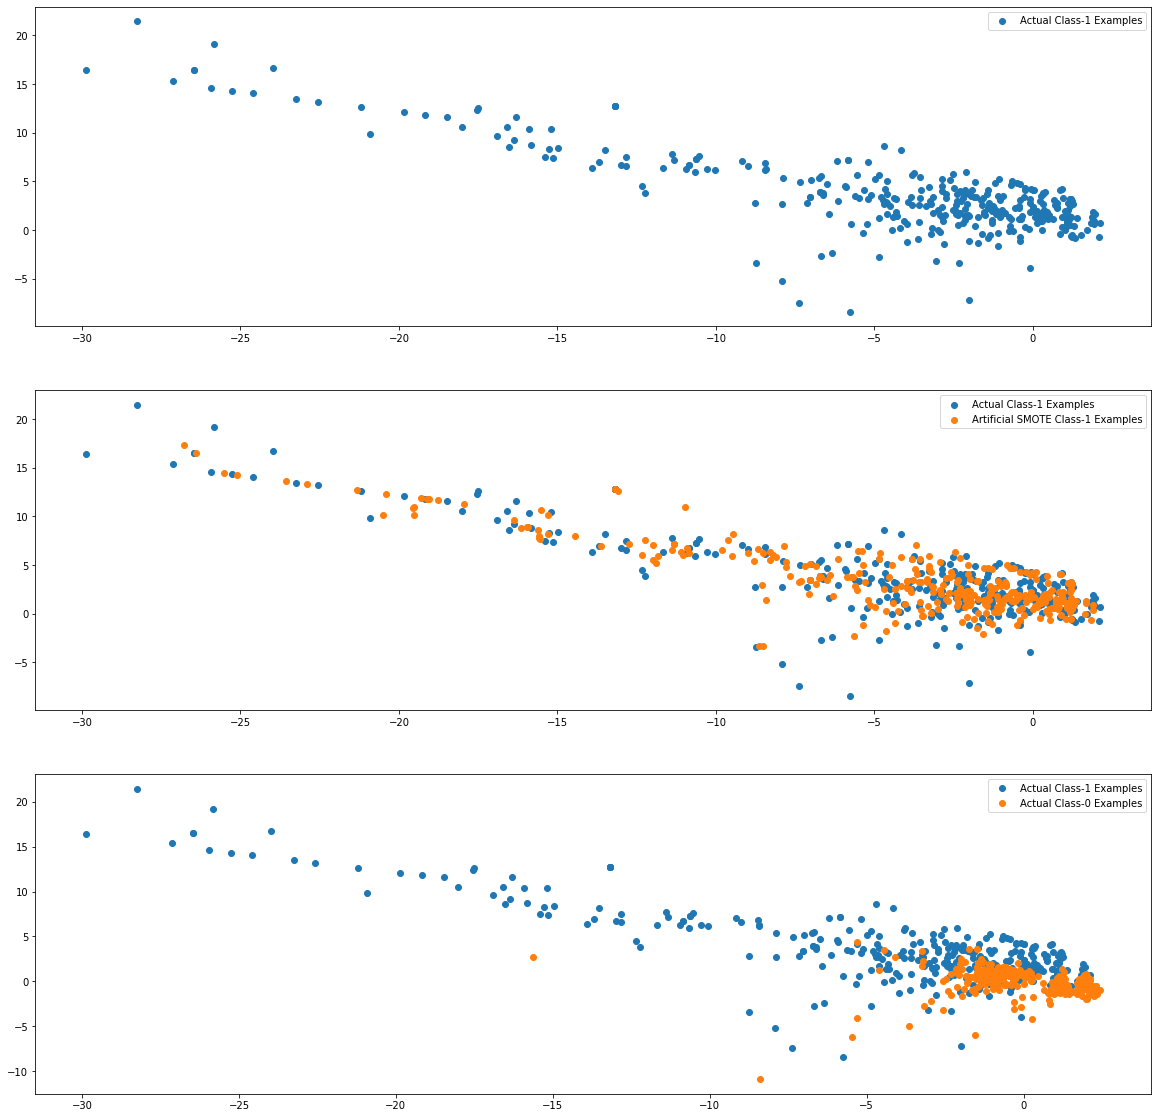

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from imblearn import over_sampling

sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]
y_train = y_train.values.flatten()
X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# transform the dataset with oversampling
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [ ]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(copy=False, method='yeo-johnson', standardize=True)
X_over_tf = power.fit_transform(X_over)

In [ ]:
# convert the array back to a dataframe
X_over_tf = pd.DataFrame(X_over_tf, columns=X_train.columns)
y_over = pd.DataFrame(y_over)

In [ ]:
# Validating the transformation
X_over_tf.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.114586,0.026039,0.310274,-0.745634,0.429114,-0.179664,0.721936,-0.093438,0.396937,0.059534,-1.190998,0.649486,0.272737,0.106087,-0.971374,0.483011,0.931021,0.410545,-0.480488,-0.198388,-0.095781,0.484415,-0.257651,-0.145024,-0.383381,1.245498,0.086067,0.365439,-0.071824
1,-0.167262,-0.662149,0.488806,-1.819057,0.405095,0.925725,0.787526,-0.158603,-0.294975,0.728511,-0.926289,0.211097,-0.386207,0.876447,-0.165620,0.038957,0.189779,1.670893,-0.619749,-0.808242,-0.321360,-0.649253,0.294426,-2.594311,-0.411390,1.924571,-0.199514,-0.111307,1.144756


#### perform cross validation and build Logistic Regression model

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
skf = StratifiedKFold(n_splits=5, random_state=42)

In [ ]:
cv_score =[]
for train_index, test_index in skf.split(X_over_tf, y_over):
    X_train_cv, X_test_cv = X_over_tf.loc[train_index], X_over_tf.loc[test_index]
    y_train_cv, y_test_cv = y_over.loc[train_index], y_over.loc[test_index]
    
    #model
    lr = LogisticRegression(max_iter = 1000, random_state=42,
                            solver = "lbfgs", penalty='l2', C=0.01)
    lr.fit(X_train_cv, y_train_cv.values.flatten())
    score = roc_auc_score(y_test_cv,lr.predict(X_test_cv))
    cv_score.append(score)    

In [ ]:
# Print the output
print('List of possible AUC score:', cv_score)
print('\nMaximum AUC That can be obtained from this model is:',
      max(cv_score)*100, '%')
print('\nMinimum AUC:',
      min(cv_score)*100, '%')

List of possible AUC score: [0.9461486282785649, 0.9452944427695709, 0.9455582353532309, 0.9475555220580847, 0.9478946839513618]

Maximum AUC That can be obtained from this model is: 94.78946839513618 %

Minimum AUC: 94.5294442769571 %


In [ ]:
# HyperParameter Tuning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score 

In [ ]:
lr = LogisticRegression(max_iter = 10000, random_state=42, solver = "lbfgs")
num_C = [0.1, 0.01, 0.001, 1, 2]  
cv_num = 11
penalty = ['l2']
grid = dict(penalty=penalty,C=num_C)
logreg_cv=GridSearchCV(lr,grid,cv=cv_num,scoring='roc_auc')
grid_result = logreg_cv.fit(X_train_cv,y_train_cv.values.flatten())

In [ ]:
print("Best set of parameters for Logistic Regression:",grid_result.best_params_)
print("Best AUC score: ", grid_result.best_score_)

Best set of parameters for Logistic Regression: {'C': 2, 'penalty': 'l2'}
Best AUC score:  0.9883800420034755


In [ ]:
# Using best HyperParameters to model on the TestCV data
lr = LogisticRegression(max_iter = 10000, random_state=42, solver = "lbfgs")
num_C = [2]
cv_num = 11
penalty = ['l2']  #--> list of values
grid = dict(penalty=penalty,C=num_C)
logreg_cv_1=GridSearchCV(lr,grid,cv=cv_num,scoring='roc_auc')
grid_result_1 = logreg_cv_1.fit(X_test_cv,y_test_cv.values.flatten())

In [ ]:
print("Test set Parameters:",grid_result_1.best_params_)
print("AUC score on CV Test set: ", grid_result_1.best_score_)

Test set Parameters: {'C': 2, 'penalty': 'l2'}
AUC score on CV Test set:  0.9883610195534774


#### RandomForest Family model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)
rf.fit(X_train_cv, y_train_cv.values.flatten())

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=100, verbose=0,
                       warm_start=False)

In [ ]:
roc_auc_score(y_test_cv, rf.predict_proba(X_test_cv)[:,1])

0.9852506631302548

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1,warm_start=True)

from sklearn.model_selection import RandomizedSearchCV

params = {
        'min_samples_leaf': [10,20,30],
        'max_depth': [3, 4, 5]
        }
param_comb = 4
random_search = RandomizedSearchCV(rf, param_distributions=params,
                                   n_iter=param_comb, scoring='roc_auc',
                                   n_jobs=-1, cv=5, verbose=3, random_state=42 )
random_search.fit(X_train_cv, y_train_cv.values.flatten())

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 12.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_best = random_search.best_estimator_
print(rf_best)
print(random_search.best_score_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=True)
0.9922613866219067


In [ ]:
rf.fit(X_train_cv,y_train_cv.values.flatten())
y_proba = rf.predict_proba(X_test_cv)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_cv, y_proba)

In [ ]:
print("AUC score on TestCV: ",roc_auc_score(y_test_cv,
                                            rf.predict_proba(X_test_cv)[:,1],average='macro'))

AUC score on TestCV:  0.9999984880315111


#### XGBoost Model Family

In [ ]:
!pip install -q xgboost==0.4a30

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
xgb=XGBClassifier(n_estimators=50)
xgb.fit(X_train_cv,y_train_cv.values.flatten(), eval_metric='auc')
y_pred = xgb.predict_proba(X_test_cv)
y_true = np.array(y_test_cv)
y_scores = y_pred[:, 1]

In [ ]:
fpr, tpr, _ = roc_curve(y_test_cv, y_scores)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9959067551038274


In [ ]:
# HyperParameter Tuning
# Using RandomizedSerarch to reduce the processing time
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = {
        'gamma': [0.5, 1, 1.5, 2, 5],
        'max_depth': [3, 4, 5]
        }
param_comb = 4
random_search = RandomizedSearchCV(xgb, param_distributions=params,
                                   n_iter=param_comb, scoring='roc_auc',
                                   n_jobs=-1, cv=5, verbose=3, random_state=42 )
random_search.fit(X_train_cv, y_train_cv.values.flatten())

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  7.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=50,
                                           nthread=-1,
                                           objective='binary:logistic',
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, seed=0,
                                           silent=True, subsample=1),
                   iid='deprecated', n_iter=4, n_jobs=-1,
                   param_distributions={'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5]},
                   pre_dispatch='2*n_jobs', r

In [ ]:
print('\n Best estimator:',random_search.best_estimator_)
print('\n Best hyperparameters:',random_search.best_params_)
print("Best_score",random_search.best_score_)


 Best estimator: XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=2,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=50, nthread=-1,
              objective='binary:logistic', reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=0, silent=True, subsample=1)

 Best hyperparameters: {'max_depth': 5, 'gamma': 2}
Best_score 0.9991545232800647


In [ ]:
# Fitting Model with Best Parameters on Test data
xgb=XGBClassifier(n_estimators=50,max_depth=5,gamma=2,base_score=0.5)
xgb.fit(X_test_cv,y_test_cv.values.flatten(), eval_metric='auc')
y_pred = xgb.predict_proba(X_test_cv)
y_true = np.array(y_test_cv)
y_scores = y_pred[:, 1]

In [ ]:
fpr, tpr, _ = roc_curve(y_test_cv, y_scores)
roc_auc = auc(fpr, tpr)
print("AUC on TestCV set: ",roc_auc)

AUC on TestCV set:  0.9993794424985716


#### DecisionTree Family

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)
dt_base.fit(X_train_cv, y_train_cv.values.flatten())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
X_train_predictions = dt_base.predict(X_train_cv)
X_train_fpr,X_train_tpr, X_train_thresholds = roc_curve(y_train_cv, X_train_predictions)

In [ ]:
# auc scores
auc_score1 = roc_auc_score(y_train_cv, X_train_predictions)
print("Train AUC",round(auc_score1,2))

Train AUC 0.94


In [ ]:
# Hyper Parameter Tuning for DecisionTree model
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
params = {
    "max_depth": [5,10],
    "min_samples_leaf": [50,100]
}
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, verbose=1, scoring='roc_auc')

In [ ]:
grid_search.fit(X_train_cv, y_train_cv.values.flatten())
grid_search.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.0min finished


0.9973431351225989

In [ ]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
# Fitting the model with best parameters in TestCV data
dt = DecisionTreeClassifier(random_state=42,
                            max_depth=10,
                            min_samples_split=2,
                            min_samples_leaf=50)
dt.fit(X_test_cv, y_test_cv.values.flatten())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
X_test_pred_best = dt.predict(X_test_cv)

In [ ]:
X_test_fpr,X_test_tpr, X_test_thresholds = roc_curve(y_test_cv, X_test_pred_best)

In [ ]:
auc_score = roc_auc_score(y_test_cv, X_test_pred_best)

print("AUC",round(auc_score,2))

AUC 0.98


#### ADASYN Over Sampling

#### Print the class distribution after applying ADASYN

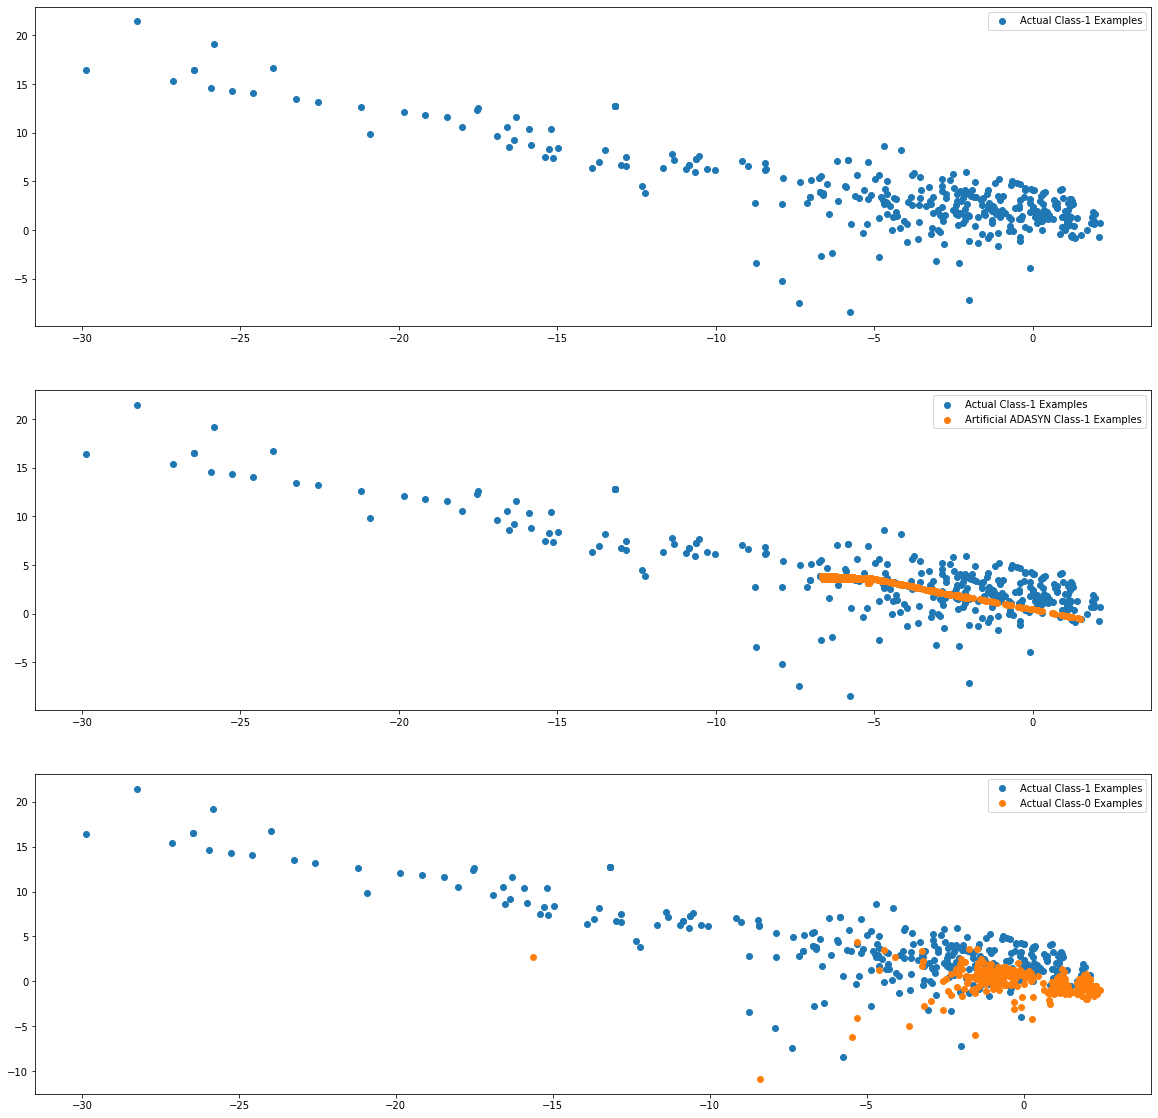

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]
y_train = y_train.values.flatten()
X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [12]:
from imblearn.over_sampling import ADASYN

In [13]:
# transform the dataset with oversampling
oversample = ADASYN()
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [14]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(copy=False, method='yeo-johnson', standardize=True)
X_over_tf = power.fit_transform(X_over)

In [15]:
# convert the array back to a dataframe
X_over_tf = pd.DataFrame(X_over_tf, columns=X_train.columns)
y_over = pd.DataFrame(y_over)

In [ ]:
# Validating the transformation
X_over_tf.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.211495,0.328356,0.212801,-0.718905,0.398103,-0.514307,0.608148,0.021151,0.266886,-0.166326,-1.162451,0.543412,0.381375,-0.116744,-1.076772,0.296875,0.727872,0.284009,-0.439603,-0.115593,-0.093670,0.575589,-0.228915,-0.120088,-0.356192,1.267613,0.245539,0.510285,-0.299803
1,-0.279822,-0.527770,0.437291,-1.857688,0.369625,0.777179,0.691341,-0.085222,-0.652671,0.614150,-0.850238,-0.007183,-0.311013,0.824511,-0.192309,-0.198369,-0.015098,1.477982,-0.581632,-0.767996,-0.535264,-0.835530,0.231478,-2.614528,-0.384345,1.888368,-0.172518,-0.044872,0.845469


Perform CrossValidation and Build Logistic Regression

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
skf = StratifiedKFold(n_splits=5, random_state=42)

In [17]:
cv_score =[]
for train_index, test_index in skf.split(X_over_tf, y_over):
    X_train_cv, X_test_cv = X_over_tf.loc[train_index], X_over_tf.loc[test_index]
    y_train_cv, y_test_cv = y_over.loc[train_index], y_over.loc[test_index]
    
    #model
    lr = LogisticRegression(max_iter = 1000, random_state=42,
                            solver = "lbfgs", penalty='l2', C=0.01)
    lr.fit(X_train_cv, y_train_cv.values.flatten())
    score = roc_auc_score(y_test_cv,lr.predict(X_test_cv))
    cv_score.append(score)    

In [ ]:
# Print the output
print('List of possible AUC score:', cv_score)
print('\nMaximum AUC That can be obtained from this model is:',
      max(cv_score)*100, '%')
print('\nMinimum AUC:',
      min(cv_score)*100, '%')

List of possible AUC score: [0.9382791019114911, 0.9310951754451096, 0.9017191551278667, 0.9332418924319217, 0.9071429071781041]

Maximum AUC That can be obtained from this model is: 93.82791019114912 %

Minimum AUC: 90.17191551278667 %


In [ ]:
# HyperParameter Tuning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score 

In [ ]:
lr = LogisticRegression(max_iter = 10000, random_state=42, solver = "lbfgs")
num_C = [0.1, 0.01, 0.001, 1, 2]  
cv_num = 11
penalty = ['l2']
grid = dict(penalty=penalty,C=num_C)
logreg_cv=GridSearchCV(lr,grid,cv=cv_num,scoring='roc_auc')
grid_result = logreg_cv.fit(X_train_cv,y_train_cv.values.flatten())

In [ ]:
print("Best set of parameters for Logistic Regression:",grid_result.best_params_)
print("Best AUC score: ", grid_result.best_score_)

Best set of parameters for Logistic Regression: {'C': 2, 'penalty': 'l2'}
Best AUC score:  0.9822691029342807


In [ ]:
# Using best HyperParameters to model on the TestCV data
lr = LogisticRegression(max_iter = 10000, random_state=42, solver = "lbfgs")
num_C = [2]
cv_num = 11
penalty = ['l2']  #--> list of values
grid = dict(penalty=penalty,C=num_C)
logreg_cv_1=GridSearchCV(lr,grid,cv=cv_num,scoring='roc_auc')
grid_result_1 = logreg_cv_1.fit(X_test_cv,y_test_cv.values.flatten())

In [ ]:
print("Test set Parameters:",grid_result_1.best_params_)
print("AUC score on CV Test set: ", grid_result_1.best_score_)

Test set Parameters: {'C': 2, 'penalty': 'l2'}
AUC score on CV Test set:  0.92504541037443


#### RamdomForest Model Family

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)
rf.fit(X_train_cv, y_train_cv.values.flatten())

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=100, verbose=0,
                       warm_start=False)

In [ ]:
roc_auc_score(y_test_cv, rf.predict_proba(X_test_cv)[:,1])

0.9675872510670283

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1,warm_start=True)

from sklearn.model_selection import RandomizedSearchCV

params = {
        'min_samples_leaf': [10,20,30],
        'max_depth': [3, 4, 5]
        }
param_comb = 4
random_search = RandomizedSearchCV(rf, param_distributions=params,
                                   n_iter=param_comb, scoring='roc_auc',
                                   n_jobs=-1, cv=5, verbose=3, random_state=42 )
random_search.fit(X_train_cv, y_train_cv.values.flatten())

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 12.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_best = random_search.best_estimator_
print(rf_best)
print("Best AUC on Train set: ",random_search.best_score_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=True)
0.979176114456088


In [ ]:
rf.fit(X_train_cv,y_train_cv.values.flatten())
y_proba = rf.predict_proba(X_test_cv)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_cv, y_proba)

In [ ]:
print("AUC score on TestCV: ",roc_auc_score(y_test_cv,
                                            rf.predict_proba(X_test_cv)[:,1],average='macro'))

AUC score on TestCV:  0.999018484028156


#### XGBoost Model Family

In [18]:
!pip install -q xgboost==0.4a30

     |████████████████████████████████| 757kB 19.8MB/s 


In [19]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
xgb=XGBClassifier(n_estimators=50)
xgb.fit(X_train_cv,y_train_cv.values.flatten(), eval_metric='auc')
y_pred = xgb.predict_proba(X_test_cv)
y_true = np.array(y_test_cv)
y_scores = y_pred[:, 1]

In [ ]:
fpr, tpr, _ = roc_curve(y_test_cv, y_scores)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9870067992797968


In [ ]:
# HyperParameter Tuning
# Using RandomizedSerarch to reduce the processing time
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = {
        'gamma': [0.5, 1, 1.5, 2, 5],
        'max_depth': [3, 4, 5]
        }
param_comb = 4
random_search = RandomizedSearchCV(xgb, param_distributions=params,
                                   n_iter=param_comb, scoring='roc_auc',
                                   n_jobs=-1, cv=5, verbose=3, random_state=42 )
random_search.fit(X_train_cv, y_train_cv.values.flatten())

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=50,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='dep

In [ ]:
print('\n Best estimator:',random_search.best_estimator_)
print('\n Best hyperparameters:',random_search.best_params_)
print("Best_score on TrainCV set: ",random_search.best_score_)


 Best estimator: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=2,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

 Best hyperparameters: {'max_depth': 3, 'gamma': 2}
Best_score on TrainCV set:  nan


In [ ]:
# Fitting Model with Best Parameters on Test data
xgb=XGBClassifier(n_estimators=50,max_depth=3,gamma=2,base_score=0.5)
xgb.fit(X_test_cv,y_test_cv.values.flatten(), eval_metric='auc')
y_pred = xgb.predict_proba(X_test_cv)
y_true = np.array(y_test_cv)
y_scores = y_pred[:, 1]

In [ ]:
fpr, tpr, _ = roc_curve(y_test_cv, y_scores)
roc_auc = auc(fpr, tpr)
print("AUC on TestCV set: ",roc_auc)

AUC on TestCV set:  0.9998580623553277


#### Decision Tree Model Family

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)
dt_base.fit(X_train_cv, y_train_cv.values.flatten())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
X_train_predictions = dt_base.predict(X_train_cv)
X_train_fpr,X_train_tpr, X_train_thresholds = roc_curve(y_train_cv, X_train_predictions)

In [ ]:
# auc scores
auc_score1 = roc_auc_score(y_train_cv, X_train_predictions)
print("Train AUC",round(auc_score1,2))

Train AUC 0.91


In [ ]:
# Hyper Parameter Tuning for DecisionTree model
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
params = {
    "max_depth": [5,10],
    "min_samples_leaf": [50,100]
}
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, verbose=1, scoring='roc_auc')

In [ ]:
grid_search.fit(X_train_cv, y_train_cv.values.flatten())
grid_search.best_score_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.8min finished


0.9701463101828838

In [ ]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
# Fitting the model with best parameters in TestCV data
dt = DecisionTreeClassifier(random_state=42,
                            max_depth=10,
                            min_samples_split=2,
                            min_samples_leaf=50)
dt.fit(X_test_cv, y_test_cv.values.flatten())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
X_test_pred_best = dt.predict(X_test_cv)

In [ ]:
X_test_fpr,X_test_tpr, X_test_thresholds = roc_curve(y_test_cv, X_test_pred_best)

In [ ]:
auc_score = roc_auc_score(y_test_cv, X_test_pred_best)

print("AUC on TestCV set",round(auc_score,2))

AUC on TestCV set 0.99


#### We can clearly observe that RandomForest Model family fits best all three categories of Oversampling when compared to other model families. Also, comparing the plots generated for SMOTE and ADASYN oversampling. We can see that the LinearRegression model performs better with SMOTE oversampled data but not with ADASYN oversampled data; DecisionTree Model performs vice versa. Whereas, RandomForest and XGBoost model families perform about same for both the categories of OverSampled datasets. 

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
# perform the best oversampling method on X_train & y_train

clf = XGBClassifier(n_estimators=50,max_depth=3,gamma=2,base_score=0.5)
clf.fit(X_test_cv,y_test_cv.values.flatten(), eval_metric='auc')
y_pred = xgb.predict_proba(X_test_cv)
y_true = np.array(y_test_cv)
y_scores = y_pred[:, 1]
fpr, tpr, _ = roc_curve(y_test_cv, y_scores)
roc_auc = auc(fpr, tpr)
print("AUC on TestCV set: ",roc_auc)

AUC on TestCV set:  0.9976771693733355


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 29


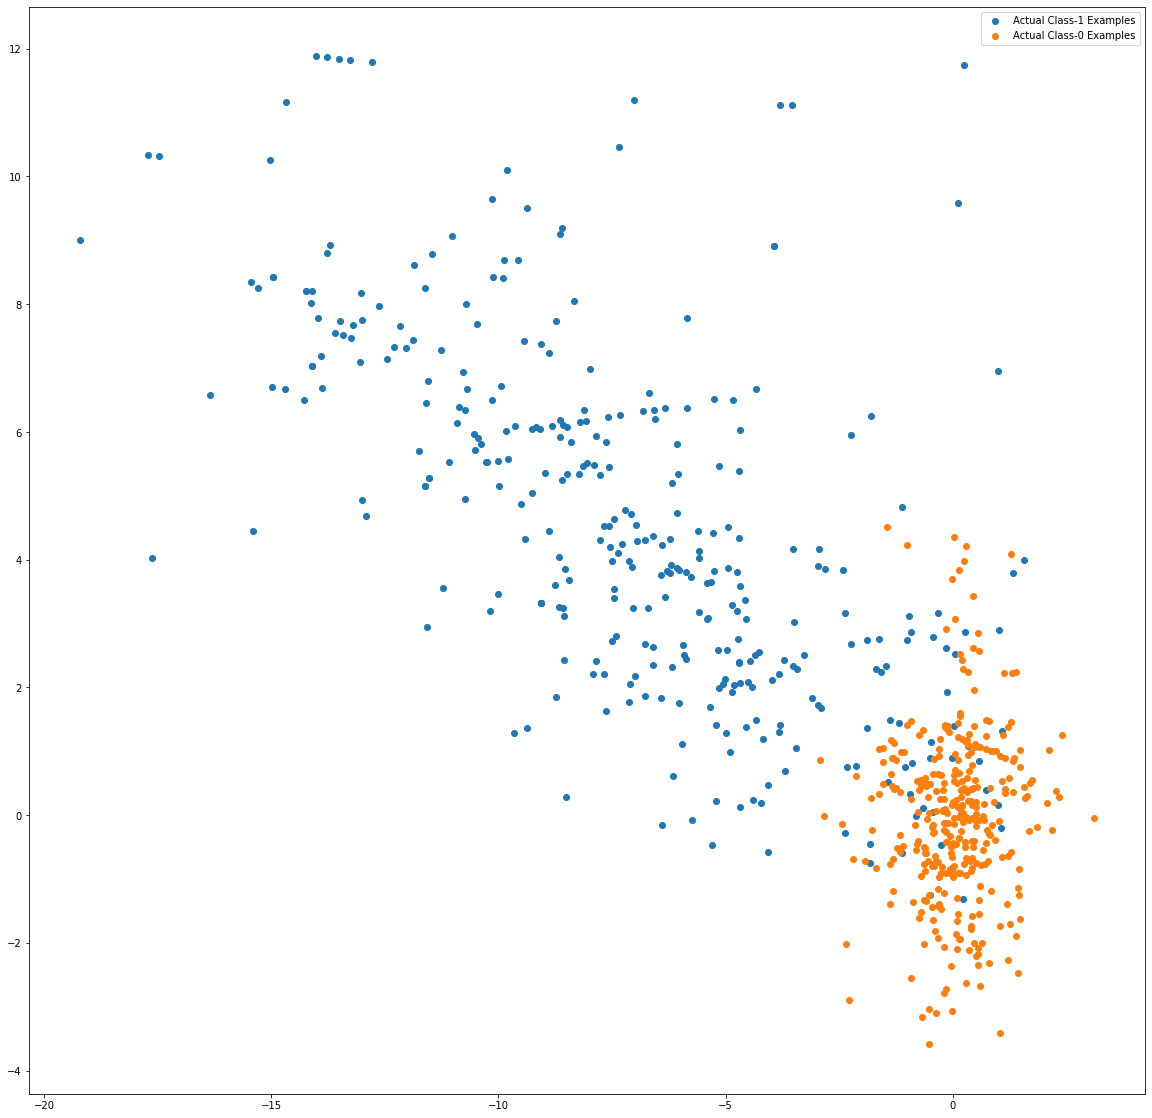

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
clf = XGBClassifier(n_estimators=50,max_depth=3,gamma=2,base_score=0.5)
clf.fit(X_train_cv,y_train_cv.values.flatten(), eval_metric='auc')
y_pred = xgb.predict_proba(X_train_cv)
y_true = np.array(y_train_cv)
y_scores = y_pred[:, 1]
fpr, tpr, thresholds = roc_curve(y_train_cv, y_scores)
roc_auc = auc(fpr, tpr)
print('Train auc =', metrics.roc_auc_score(y_train_cv, y_scores))
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.983539227843273
0.28171512


We can see that the XGBoost Model with auc score of 0.98 is telling us to keep the threshold of about 28% probability while predicting the Fraudulent transactions with th gives Features.
Below is the list of top 3 Best Features after performing OverSampling:
- Top var = 14
- 2nd Top var = 4
- 3rd Top var = 29

Below are the list of top 3 Best Features with original PCA transformed data:
- Top var = 12
- 2nd Top var = 17
- 3rd Top var = 14

#### Performing XGBoost modelling with best parameters on Test set

In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [25]:
# perform the best oversampling method on X_train & y_train

clf = XGBClassifier(n_estimators=50,max_depth=3,gamma=2,base_score=0.5)
clf.fit(X_test,y_test.values.flatten(), eval_metric='auc')
y_pred = clf.predict_proba(X_test)
y_true = np.array(y_test)
y_scores = y_pred[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print("AUC on Test set: ",roc_auc)

AUC on Test set:  0.9783045883681912


### We have are able to learn a XGBoost model on the Credit Card Fraud data which can predict the Fraudulent Transactions classification using OverSampling techniques. The model is able to make fairly descent predictions based on our analysis. However, there is scope of improving the model performance by considering many other aspects like Feature Engineering and fine-tuning Hyper-Parameters. 